In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import floor
from pathlib import Path
import json

__rows = 1
__cols = 1


def sb_init( cols, rows):
    fig = plt.figure(figsize=[cols*5, rows*4])
    global __rows
    global __cols
    __rows = rows
    __cols = cols
    plt.subplot(rows, cols, 1)
    return fig


def sb(x, y):
    return plt.subplot(__rows, __cols, x + (y - 1) * __cols)


In [4]:
# Load data

p = Path('./')
dirs = [f for f in p.iterdir() if f.is_dir()]
data = []

for d in dirs:
    item = {}
    item.update( json.loads( (d / 'details.txt')   .read_text() ) )
    temp = (d / 'deposition.txt')   .read_text()
    temp = temp.replace("nan","0")
    item.update( json.loads( temp ) )
    data.append(item)

In [5]:
data[0]

{'side': 64,
 'defects_frac': 0.2,
 'gamma': 0.2,
 'replies': 100,
 'corr_range': -1,
 'dep_polymers': 'Dimers',
 'occupation_average': 2767.52,
 'occupation_std': 16.4805,
 'occupation_fraction_average': 0.675664,
 'occupation_fraction_std': 0.00402355}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


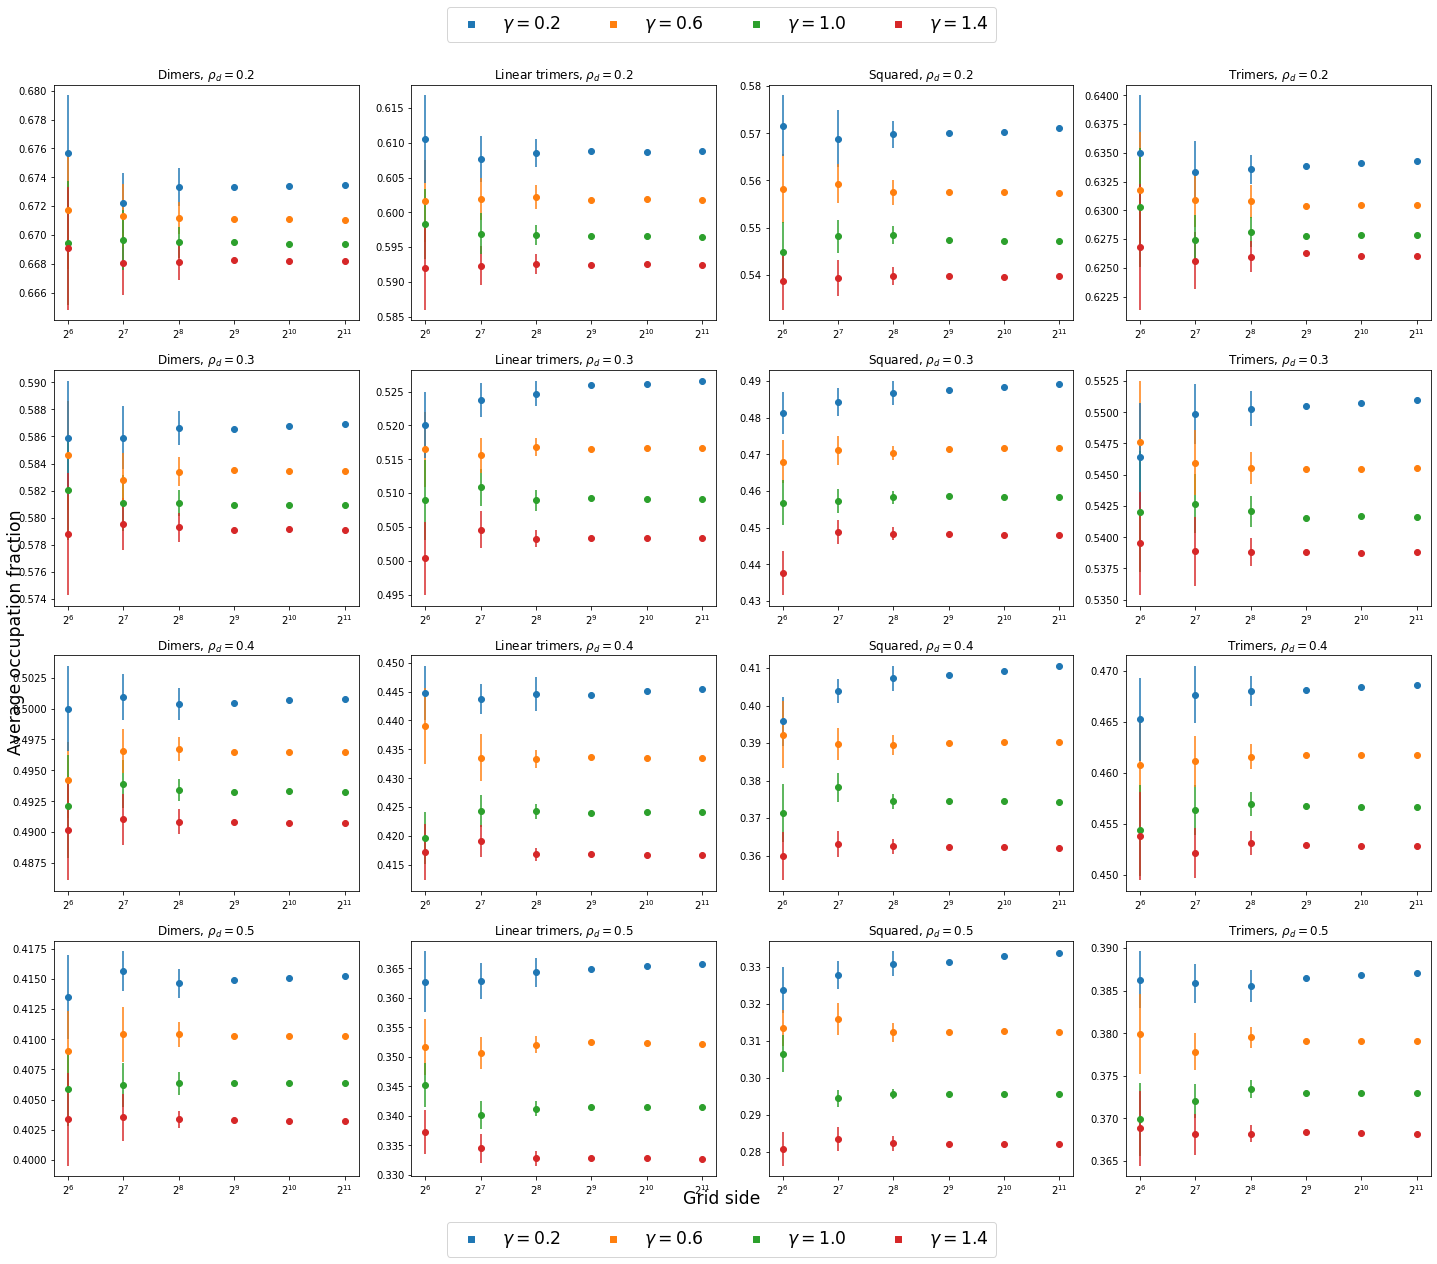

In [60]:
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
marker_list = ['+','x','*','o']

gammas = np.unique( [i['gamma'] for i in data] ).tolist()
polys = np.unique( [i['dep_polymers'] for i in data] ).tolist()
fracs = np.unique( [i['defects_frac'] for i in data] ).tolist()
sizes = np.unique( [i['side'] for i in data] ).tolist()

fig = sb_init( len( polys ), len( fracs ) )

for i_p, p in enumerate( polys ):
    for i_f, f in enumerate( fracs ):
        axes = sb( i_p+1, i_f+1 )
        current = [ v for v in data if v['dep_polymers'] == p and v['defects_frac'] == f ]
        for cc in current:
            plt.errorbar( cc['side'], cc['occupation_fraction_average'], yerr=cc['occupation_fraction_std'],
                marker = 'o', c= color_list[ gammas.index( cc['gamma'] ) ] )
        plt.xscale( 'log', basex=2 )
        plt.xticks( sizes )
        plt.title( p + r", $\rho_d = $" + str(f) )

fig.text(0.5, 0.004, 'Grid side', ha='center', fontsize='xx-large')
fig.text(0.004, 0.5, 'Average occupation fraction', va='center', rotation='vertical',fontsize='xx-large')

for g in gammas:
    plt.scatter( [], [], c= color_list[ gammas.index( g ) ], marker= 's', label= r"$\gamma =$" + str(g) )
h, l = axes.get_legend_handles_labels()
fig.legend(  h, l, loc = 'upper center', bbox_to_anchor=(0.5, 1.05), bbox_transform=plt.gcf().transFigure, ncol=len(h), fontsize='xx-large' )
fig.legend(  h, l, loc = 'lower center', bbox_to_anchor=(0.5, -0.05), bbox_transform=plt.gcf().transFigure, ncol=len(h), fontsize='xx-large' )
plt.tight_layout()

plt.savefig('size_scan.png', bbox_inches='tight')
plt.savefig('size_scan.pdf', bbox_inches='tight')

In [56]:
errors = [ i['occupation_fraction_std'] / i['occupation_fraction_average'] for i in data ]
errors

[0.00595495690165526,
 0.007828672303261173,
 0.010423756820373779,
 0.0035351202512584434,
 0.004394073129518078,
 0.005423492587974373,
 0.007036768919196736,
 0.003952806540833641,
 0.00530774270881954,
 0.00666406636657161,
 0.010206929740134745,
 0.004505087608294783,
 0.005497665617516066,
 0.016610205891493236,
 0.006799260352420317,
 0.007964088735532249,
 0.0033733684588672015,
 0.003979710084698489,
 0.004738487825138532,
 0.006882449140034561,
 0.003314571650418428,
 0.005066483315610635,
 0.005327891754998187,
 0.007339509830565864,
 0.008420033083754136,
 0.00417474996588824,
 0.0053785978741191925,
 0.006659152281987424,
 0.009750688629352139,
 0.004840114189989543,
 0.00651662379080564,
 0.007382684971478456,
 0.011605498922022152,
 0.0019447835630924057,
 0.002047456246685355,
 0.008694986952199486,
 0.003300546448087432,
 0.004846757887642343,
 0.0021065353427394268,
 0.0025123614616781057,
 0.003631855398173418,
 0.00675170854054587,
 0.002653673822590122,
 0.00321351